In [1]:
# define matplotlibplotting backend
# %matplotlib -l shows all available backends
%matplotlib nbagg

In [2]:
import numpy as np

from lib.parameters import Parameters
from lib.plot_builder import PlotBuilder
from lib.h5_reader import H5Reader
from lib.plain_reader import PlainReader

/home/vyo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
##  configuration options
el_charge = 1.6e-19
rho_beam_scale = 1
config_file = '../testdir/parameters.xml'

cfg = Parameters(config_file)
clim_estimation = cfg.get_clim_estimation()

timestamp=1.5e-11
use_grid=False
cmap='terrain'

clim_e_r = [-clim_estimation, clim_estimation]
clim_e_z = [-clim_estimation, clim_estimation]
clim_rho_beam = [-(cfg.bunch_density * el_charge * rho_beam_scale), 0]

x_axis_label = r'$\mathit{Z (m)}$'
y_axis_label = r'$\mathit{R (m)}$'
cbar_axis_label = r'$\frac{V}{m}$'
cbar_bunch_density_axis_label = r'$m^{-3}$'

e_r_plot_name = r'$\mathbf{Electrical\enspace Field\enspace Radial\enspace Component}\enspace(E_r)$'
e_z_plot_name = r'$\mathbf{Electrical\enspace Field\enspace Longitudal\enspace Component}\enspace(E_z)$'
rho_beam_plot_name = r'$\mathbf{Electron\enspace Bunch\enspace Density}\enspace (\rho_{bunch})$'

<IPython.core.display.Javascript object>


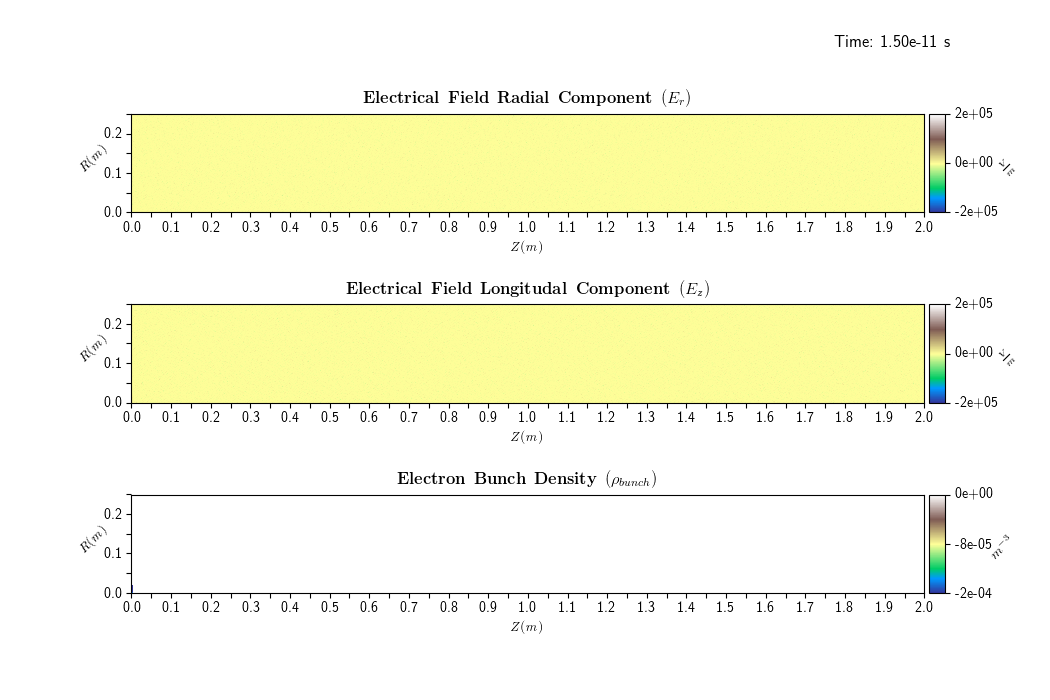

In [6]:
# define reader (plain reader used)
if not cfg.use_hdf5:
    reader = PlainReader(cfg.data_path, cfg.system_state_path,
                         [cfg.number_r_grid , cfg.number_z_grid],
                         cfg.frames_per_file, False)
else:
    raise NotImplementedError('HDF5 support still not implemented')

# define plot builder
plot = PlotBuilder(cfg.number_z_grid, cfg.number_r_grid,
                   fig_color=cfg.figure_color, 
                   fig_width=cfg.figure_width,
                   fig_height=cfg.figure_height, 
                   fig_dpi=cfg.figure_dpi,
                   font_family=cfg.figure_font_family,
                   font_name=cfg.figure_font_name,
                   font_size=cfg.figure_font_size,
                   
                   x_ticklabel_end=cfg.z_size, y_ticklabel_end=cfg.r_size,
                   tickbox=True, grid=use_grid, is_invert_y_axe=False,
                   aspect='equal', image_interpolation='nearest')

In [7]:
# add subplots
plot.add_subplot_cartesian_2d(e_r_plot_name, 311, x_axe_label=x_axis_label, y_axe_label=y_axis_label)
plot.add_subplot_cartesian_2d(e_z_plot_name, 312, x_axe_label=x_axis_label, y_axe_label=y_axis_label)
plot.add_subplot_cartesian_2d(rho_beam_plot_name, 313, x_axe_label=x_axis_label, y_axe_label=y_axis_label)

# add initial image with zeros and colorbar
initial_image = np.zeros([cfg.number_r_grid, cfg.number_z_grid])

# add dummy images
plot.add_image(e_r_plot_name, initial_image, cmap=cmap, clim=clim_e_r)
plot.add_image(e_z_plot_name, initial_image, cmap=cmap, clim=clim_e_z)
plot.add_image(rho_beam_plot_name, initial_image, cmap=cmap, clim=clim_rho_beam)

# add colorbars
plot.add_colorbar(e_r_plot_name, ticks=clim_e_r, title=cbar_axis_label)
plot.add_colorbar(e_z_plot_name, ticks=clim_e_z, title=cbar_axis_label)
plot.add_colorbar(rho_beam_plot_name, ticks=clim_rho_beam, title=cbar_bunch_density_axis_label)


plot.show()

In [8]:
# get data
frame = cfg.get_frame_number_by_timestamp(timestamp)
data_r = reader.get_frame('E_r', frame)
data_z = reader.get_frame('E_z', frame)
data_beam = reader.get_frame('rho_beam', frame)

# add timestamp to plot
plot.get_figure().suptitle("Time: {:.2e} s".format(timestamp), x=.85, y=.95)

# add images
plot.add_image(e_r_plot_name, data_r, cmap=cmap, clim=clim_e_r)
plot.add_image(e_z_plot_name, data_z, cmap=cmap, clim=clim_e_z)
plot.add_image(rho_beam_plot_name, data_beam, cmap=cmap, clim=clim_rho_beam)

plot.redraw()